# All figures of the paperdraft

In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from matplotlib.gridspec import GridSpec
import os
from cycler import cycler
# Color blind safe from here https://sronpersonalpages.nl/~pault/
# tol_bright_colors = ['#4477AA', '#66CCEE', '#228833', '#CCBB44', '#EE6677', '#AA3377', '#BBBBBB'][::2]
tol_bright_colors = ['#4477AA', '#228833', '#CCBB44', '#EE6677', '#AA3377']
plt.rc('axes', prop_cycle=cycler('color', tol_bright_colors))


def get_experiment_base_path():
    notebook_dir = Path(os.path.dirname(os.path.abspath("__file__")))
    experiment_base_path = notebook_dir / "../experiments/"
    return experiment_base_path

def get_output_fig_path():
    notebook_dir = Path(os.path.dirname(os.path.abspath("__file__")))
    output_fig_path = notebook_dir / "../figures/"
    return output_fig_path



with open(get_experiment_base_path() / 'paperdraft.json', 'r') as f:
    experiment_dict = json.load(f)

def get_experiment_path(experiment):
    return get_experiment_base_path() / experiment_dict[experiment]['experiment_path']

def get_metrics_dict(experiment):
    with open(get_experiment_path(experiment) / 'ensemble_metrics.json', 'r') as f:
        return json.load(f)

## Figure Performance

/tmp/ipykernel_101631/1863025253.py:215: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


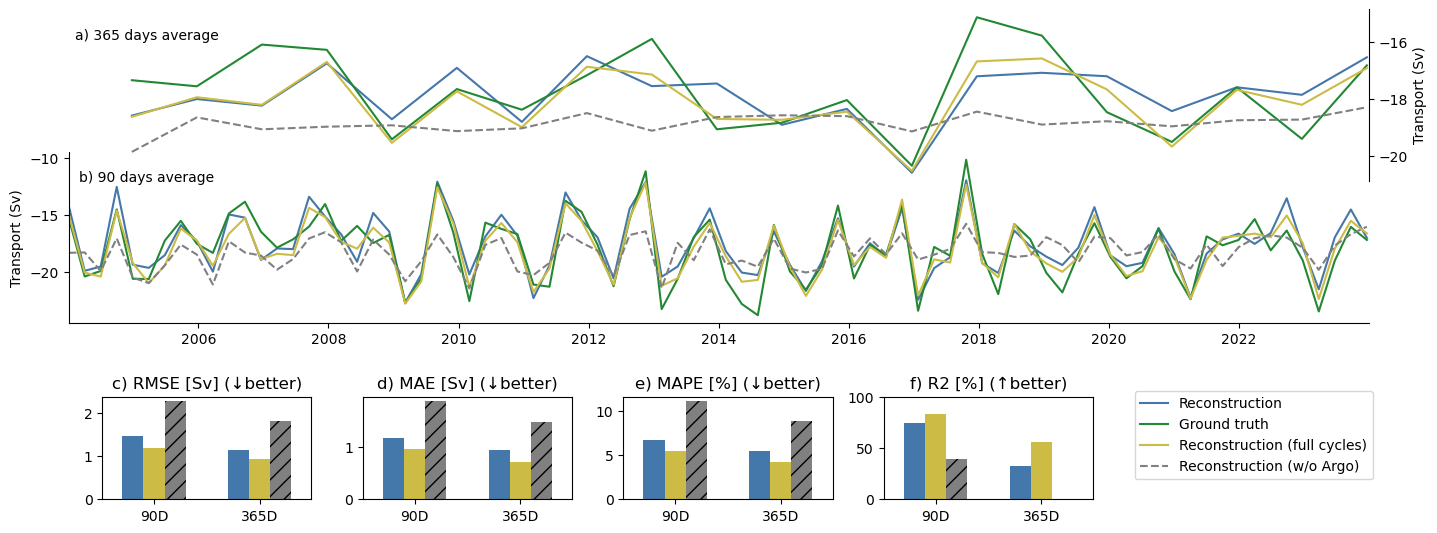

In [2]:
experiment_id_10d = '008'
experiment_id_30d = '009'
experiment_id_90d = '010'
experiment_id_365d = '011'

experiment_id_90d_sixcycles = '049'
experiment_id_365d_sixcycles = '050'

experiment_id_90d_wo_argo = '039'
experiment_id_365d_wo_argo = '040'

test_predictions_10d = xr.open_dataset(get_experiment_path(experiment_id_10d) / 'ensemble_predictions.nc').mean('member')
test_predictions_30d = xr.open_dataset(get_experiment_path(experiment_id_30d) / 'ensemble_predictions.nc').mean('member')
test_predictions_90d = xr.open_dataset(get_experiment_path(experiment_id_90d) / 'ensemble_predictions.nc').mean('member')
test_predictions_365d = xr.open_dataset(get_experiment_path(experiment_id_365d) / 'ensemble_predictions.nc').mean('member')

test_predictions_90d_sixcycles = xr.open_dataset( get_experiment_path(experiment_id_90d_sixcycles) / 'ensemble_predictions.nc').mean('member')
test_predictions_365d_sixcycles = xr.open_dataset( get_experiment_path(experiment_id_365d_sixcycles) / 'ensemble_predictions.nc').mean('member')

test_predictions_90d_wo_argo = xr.open_dataset( get_experiment_path(experiment_id_90d_wo_argo) / 'ensemble_predictions.nc').mean('member')
test_predictions_365d_wo_argo = xr.open_dataset( get_experiment_path(experiment_id_365d_wo_argo) / 'ensemble_predictions.nc').mean('member')


# test_predictions_10d = xr.open_dataset(get_experiment_path('033') / 'ensemble_predictions.nc').mean('member')
# test_predictions_30d = xr.open_dataset(get_experiment_path('034') / 'ensemble_predictions.nc').mean('member')
# test_predictions_90d = xr.open_dataset(get_experiment_path('035') / 'ensemble_predictions.nc').mean('member')
# test_predictions_365d = xr.open_dataset(get_experiment_path('036') / 'ensemble_predictions.nc').mean('member')

# test_predictions_365d['time'] = test_predictions_365d.time + np.array(5396198400000000000, dtype='timedelta64[ns]')

axes_width = .6

min_time = min(
    test_predictions_10d.time.min(),
    test_predictions_30d.time.min(),
    test_predictions_90d.time.min(),
    test_predictions_365d.time.min(),

)

max_time = max(
    test_predictions_10d.time.max(),
    test_predictions_30d.time.max(),
    test_predictions_90d.time.max(),
    test_predictions_365d.time.max(),
)

fig = plt.figure(figsize=(13,5))
label_y = .85

base_height = .43
overlap_percentage = .2
delta = (1 - base_height)


height_per_plot = delta * (1 + 1 * overlap_percentage) / 2


gs = GridSpec(2,5, figure=fig, height_ratios=[3,1])
# ax = fig.add_axes([0, base_height + (delta / 2) * 0, 1, height_per_plot])

# ax.plot(test_predictions_10d.time, test_predictions_10d.test_predictions, label = 'Reconstruction (Argo 2000m)')
# ax.plot(test_predictions_10d.time, test_predictions_10d.test_gt_transport, label='Ground truth')


# # remove the x-axis and also the border
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# # ax.spines['bottom'].set_visible(False)

# # ax.set_xticks([])

# # ax.legend(loc = 'lower right')

# ax.set_xlim(min_time.values, max_time.values)
# ax.text(0.06, label_y, 'd) 10 days average', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)


# ax.set_ylabel('Transport (Sv)')


# ax = fig.add_axes([0, base_height + (delta / 4) * 1, 1, height_per_plot])


# ax.plot(test_predictions_30d.time, test_predictions_30d.test_predictions, label = 'Reconstruction')
# # ax.plot(test_predictions_deep_30d.time, test_predictions_deep_30d.test_predictions, label='Reconstruction (Deep Argo)')
# ax.plot(test_predictions_30d.time, test_predictions_30d.test_gt_transport, label='Ground truth')


# # remove the x-axis and also the border
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# ax.set_xticks([])
# ax.set_xlim(min_time.values, max_time.values)
# ax.text(0.06, label_y, 'c) 30 days average', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# #set y axis on right
# ax.yaxis.tick_right()
# ax.yaxis.set_label_position("right")
# ax.set_facecolor('none')
# ax.set_ylabel('Transport (Sv)')

ax = fig.add_axes([0, base_height + (delta / 2) * 0, 1, height_per_plot])

ax.plot(test_predictions_90d.time, test_predictions_90d.test_predictions, label = 'Reconstruction')
# ax.plot(test_predictions_deep_90d.time, test_predictions_deep_90d.test_predictions, label='Reconstruction (Deep Argo)')
ax.plot(test_predictions_90d.time, test_predictions_90d.test_gt_transport, label='Ground truth')
ax.plot(test_predictions_90d.time, test_predictions_90d_sixcycles.test_predictions, label = 'Reconstruction (full cycles)')
ax.plot(test_predictions_90d.time, test_predictions_90d_wo_argo.test_predictions, label = 'Reconstruction (w/o Argo)', color = 'gray', linestyle = '--')

ax.legend(bbox_to_anchor=(.82, -.4), loc='upper left', borderaxespad=0.)

# remove the x-axis and also the border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# ax.set_xticks([])

ax.set_ylabel('Transport (Sv)')

#set background color to transparent
ax.set_facecolor('none')
ax.set_xlim(min_time.values, max_time.values)
ax.text(0.06, label_y, 'b) 90 days average', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax = fig.add_axes([0, base_height + (delta / 2) * 1, 1, height_per_plot])

ax.plot(test_predictions_365d.time, test_predictions_365d.test_predictions, label = 'Reconstruction')
# ax.plot(test_predictions_deep_90d.time, test_predictions_deep_90d.test_predictions, label='Reconstruction (Deep Argo)')
ax.plot(test_predictions_365d.time, test_predictions_365d.test_gt_transport, label='Ground truth')
ax.plot(test_predictions_365d.time, test_predictions_365d_sixcycles.test_predictions, label = 'Reconstruction (full cycles)')
ax.plot(test_predictions_365d.time, test_predictions_365d_wo_argo.test_predictions, label = 'Reconstruction (w/o Argo)', color = 'gray', linestyle = '--')


# remove the x-axis and also the border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])

ax.set_ylabel('Transport (Sv)')

#set background color to transparent
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_facecolor('none')
ax.set_xlim(min_time.values, max_time.values)
ax.text(0.06, label_y, 'a) 365 days average', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# fig.tight_layout()


# plt.savefig('../rapid-geostrophic-reconstruction/figs/transport_reconstruction.png', dpi=300)

# save complete figure

# fig.savefig('../rapid-geostrophic-reconstruction/figs/transport_reconstruction.png', dpi=300)

values = [
    # (1, get_metrics_dict(experiment_id_10d), 10),
    # (2, get_metrics_dict(experiment_id_30d), 30),
    (3, get_metrics_dict(experiment_id_90d), 90),
    (4, get_metrics_dict(experiment_id_365d), 365),
]

values_sixcycles = [
    (3, get_metrics_dict(experiment_id_90d_sixcycles), 90),
    (4, get_metrics_dict(experiment_id_365d_sixcycles), 365),
]

values_wo_argo = [
    (3, get_metrics_dict(experiment_id_90d_wo_argo), 90),
    (4, get_metrics_dict(experiment_id_365d_wo_argo), 365),
]

def plot_metrics(variable_name, ax, scale = 1, charachter = 'xxx'):
    ax.bar([i[0] - (.2 ) for ii, i in enumerate(values)],[i[1]['original']['mean'][variable_name] * scale for i in values ], width=.2)
    ax.bar([i[0] for i in values_sixcycles],[i[1]['original']['mean'][variable_name] for i in values_sixcycles ], label = f'{variable_name} (full cycles)', alpha = 0)
    ax.bar([i[0]  for i in values_sixcycles],[i[1]['original']['mean'][variable_name] * scale for i in values_sixcycles ], label = f'{variable_name} (full cycles)', width = .2)
    ax.bar([i[0] + .2  for i in values_wo_argo],[i[1]['original']['mean'][variable_name] * scale for i in values_wo_argo ], label = f'{variable_name} (full cycles)', width = .2, color = 'gray', hatch='//')
    # ax.add_patch(plt.Rectangle((0.045, 0.09), .105, .2, fc='white', edgecolor='black', lw=1.5,  transform=ax.transAxes))
    # ax.text(0.1, 0.18, f'{charachter})', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

    if variable_name == 'R2':
        ax.set_ylim(0, 100)

ax = fig.add_subplot(gs[1,0])
plot_metrics('RMSE', ax, charachter='e')
ax.set_xticks([i[0] for i in values])
ax.set_xticklabels([f'{i[2]}D' for i in values])
ax.set_title('c) RMSE [Sv] (↓better)')

ax = fig.add_subplot(gs[1,1])
plot_metrics('MAE', ax, charachter='f')
ax.set_xticks([i[0] for i in values])
ax.set_xticklabels([f'{i[2]}D' for i in values])
ax.set_title('d) MAE [Sv] (↓better)')

ax = fig.add_subplot(gs[1,2])
plot_metrics('MAPE', ax, 100, charachter='g')
ax.set_xticks([i[0] for i in values])
ax.set_xticklabels([f'{i[2]}D' for i in values])
ax.set_title('e) MAPE [%] (↓better)')

ax = fig.add_subplot(gs[1,3])
plot_metrics('R2', ax, 100, charachter='h')
ax.set_xticks([i[0] for i in values])
ax.set_xticklabels([f'{i[2]}D' for i in values])
ax.set_title('f) R2 [%] (↑better)')

fig.tight_layout()
fig.savefig(get_output_fig_path() / '04_transport_geostorphic.png', dpi=300, bbox_inches='tight')